In [3]:
!pip install waymo-open-dataset-tf-2-12-0==1.6.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 123.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 121.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 117.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 10.6 MB/s eta 0:00:

In [28]:
# Install torch with a version known to work on Python 3.11 and address the TypeIs import issue.
# You can check the PyTorch website for the exact command for your setup (CUDA version, etc.).
# This example uses a CPU-only version for simplicity
# Install torch with CUDA support
# Check https://pytorch.org/get-started/locally/ for the command matching your CUDA version
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
!pip install gcsfs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.1/216.1 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.16.2
    Uninstalling google-auth-2.16.2:
      Successfully uninstalled google-auth-2.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
waymo-open-dataset-tf-2-12-0 1.6.7 requires google-auth==2.16.2, but you have google-auth 2.40.2 which is incompatible.
google-colab 1.0.0 requires google-auth==2.38.0, but you have google-auth 2.40.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
bigframes 2.4.0 requires matplotlib>=3.7.1, but you have matplotlib 3.6.1 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
google-genai 1.15.0 requires typing-extensions<5.0.0,>=4.11.0, but 

In [3]:
!pip install timm

In [1]:
from typing import Tuple
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import math
import numpy as np
import cv2
from waymo_open_dataset import dataset_pb2 as open_dataset
from waymo_open_dataset.wdl_limited.camera.ops import py_camera_model_ops

from waymo_open_dataset.protos import end_to_end_driving_data_pb2 as wod_e2ed_pb2
from waymo_open_dataset.protos import end_to_end_driving_submission_pb2 as wod_e2ed_submission_pb2

ERROR:jax._src.xla_bridge:Jax plugin configuration error: Plugin module %s could not be loaded
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/xla_bridge.py", line 420, in discover_pjrt_plugins
    plugin_module = importlib.import_module(plugin_module_name)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_r

In [2]:
# Step 1: Authenticate your Google account
from google.colab import auth
auth.authenticate_user()

In [3]:
# Step 2: Install gcsfuse (correct repository & key setup)
!sudo apt-get update
!sudo apt-get install -y curl gnupg lsb-release

!export GCSFUSE_REPO=gcsfuse-`lsb_release -c -s`
!echo "deb http://packages.cloud.google.com/apt $GCSFUSE_REPO main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -

!sudo apt-get update
!sudo apt-get install -y gcsfuse

E: Malformed entry 1 in list file /etc/apt/sources.list.d/gcsfuse.list (Component)
E: The list of sources could not be read.
E: Malformed entry 1 in list file /etc/apt/sources.list.d/gcsfuse.list (Component)
E: The list of sources could not be read.
deb http://packages.cloud.google.com/apt  main
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1022  100  1022    0     0   4379      0 --:--:-- --:--:-- --:--:--  4386
OK
E: Malformed entry 1 in list file /etc/apt/sources.list.d/gcsfuse.list (Component)
E: The list of sources could not be read.
E: Malformed entry 1 in list file /etc/apt/sources.list.d/gcsfuse.list (Component)
E: The list of sources could not be read.


In [4]:
# Step 3: Create a local mount point
GCS_BUCKET = 'waymo_open_dataset_end_to_end_camera_v_1_0_0'  # <-- change this
MOUNT_POINT = '/gcs_bucket'      # You can rename this if needed
os.makedirs(MOUNT_POINT, exist_ok=True)

# Step 4: Mount the bucket using gcsfuse
!gcsfuse {GCS_BUCKET} {MOUNT_POINT}


/bin/bash: line 1: gcsfuse: command not found


In [5]:
# Replace with your actual bucket and path
GCS_BUCKET = 'waymo_open_dataset_end_to_end_camera_v_1_0_0'
# BUCKET_PATH = 'waymo_open_dataset_end_to_end_camera_v_1_0_0'

# Construct the dataset folder path using os.path.join
# DATASET_FOLDER = os.path.join('gs://', GCS_BUCKET, BUCKET_PATH)
DATASET_FOLDER = os.path.join('gs://', GCS_BUCKET)

# Match the training files using a wildcard
TRAIN_FILES = os.path.join(DATASET_FOLDER, 'training*')
VAL_FILES = os.path.join(DATASET_FOLDER, 'val*')
TEST_FILES = os.path.join(DATASET_FOLDER, 'test*')

In [6]:
train_filenames = tf.io.matching_files(TRAIN_FILES)
train_dataset = tf.data.TFRecordDataset(train_filenames, compression_type='')
train_dataset_iter = train_dataset.as_numpy_iterator()

val_filenames = tf.io.matching_files(VAL_FILES)
val_dataset = tf.data.TFRecordDataset(val_filenames, compression_type='')
val_dataset_iter = val_dataset.as_numpy_iterator()

test_filenames = tf.io.matching_files(TEST_FILES)
test_dataset = tf.data.TFRecordDataset(test_filenames, compression_type='')
test_dataset_iter = test_dataset.as_numpy_iterator()

In [7]:
num_train = train_filenames.shape[0]
num_val = val_filenames.shape[0]
num_test = test_filenames.shape[0]

print("num_train")
print(num_train)
print("num_val")
print(num_val)
print("num_test")
print(num_test)

num_train
263
num_val
94
num_test
268


In [8]:
bytes_example = next(train_dataset_iter)
data = wod_e2ed_pb2.E2EDFrame()
data.ParseFromString(bytes_example)

2713382

In [9]:
def return_front3_cameras(data: wod_e2ed_pb2.E2EDFrame):
  """Return the front_left, front, and front_right cameras as a list of images"""
  image_list = []
  calibration_list = []
  # CameraName Enum reference:
  # https://github.com/waymo-research/waymo-open-dataset/blob/5f8a1cd42491210e7de629b6f8fc09b65e0cbe99/src/waymo_open_dataset/dataset.proto#L50
  order = [2, 1, 3]
  for camera_name in order:
    for index, image_content in enumerate(data.frame.images):
      if image_content.name == camera_name:
        # Decode the raw image string and convert to numpy type.
        calibration = data.frame.context.camera_calibrations[index]
        image = tf.io.decode_image(image_content.image).numpy()
        image_list.append(image)
        calibration_list.append(calibration)
        break

  return image_list, calibration_list

In [10]:
CAMERA_NAME_ENUM = {
    2: "FRONT_LEFT",
    1: "FRONT",
    3: "FRONT_RIGHT"
}
intent_map = { "UNKNOWN": 0,
              "GO_STRAIGHT": 1,
               "GO_LEFT": 2,
               "GO_RIGHT": 3
}

def parse_e2ed_frame_with_past_dynamics_and_front3(bytes_example, image_size=(224, 224)):
    data = wod_e2ed_pb2.E2EDFrame()
    data.ParseFromString(bytes_example)

    # --- Extract front 3 images and calibrations ---
    image_list = []
    order = [2, 1, 3]
    for camera_name in order:  # FRONT_LEFT, FRONT, FRONT_RIGHT
        found = False
        for idx, img_content in enumerate(data.frame.images):
            if img_content.name == camera_name :
                image = tf.io.decode_jpeg(img_content.image)
                image = tf.image.resize(image, image_size)
                image = tf.cast(image, tf.float32) / 255.0
                image_list.append(image)
                found = True
                break
        if not found:
            return None  # Skip this sample if any of the 3 images are missing

    image_stack = tf.stack(image_list, axis=0)  # [3, H, W, 3]

    # --- Past dynamics ---
    past_dyn = np.stack([
        data.past_states.pos_x,
        data.past_states.pos_y,
        data.past_states.vel_x,
        data.past_states.vel_y,
        data.past_states.accel_x,
        data.past_states.accel_y], axis=1)  #[16.3]


    # --- Intent ---
    intent_label = data.intent
    intent_one_hot = tf.one_hot(intent_label, depth=4)

    # --- Future (x, y) trajectory ---
    future_xy = np.stack([
        data.future_states.pos_x,
        data.future_states.pos_y,
        data.future_states.pos_z
    ], axis=1) # [20,3]

    return ((image_stack, intent_one_hot, past_dyn), future_xy)


In [11]:
X, Y = parse_e2ed_frame_with_past_dynamics_and_front3(bytes_example)
print(X[0].shape)
print(X[1].shape)
print(X[2].shape)
print(Y.shape)

(3, 224, 224, 3)
(4,)
(16, 6)
(20, 3)


In [12]:
def load_n_samples_from_iterator(dataset_iter, N, image_size=(224, 224)):
    X_images, X_intents, X_past_dyn, Y_future_xy = [], [], [], []

    count = 0
    while count < N:
        try:
            bytes_example = next(dataset_iter)
            result = parse_e2ed_frame_with_past_dynamics_and_front3(bytes_example, image_size=image_size)
            if result is None:
                continue  # skip incomplete frames
            (images, intent, past_dyn), future_xy = result

            X_images.append(images)        # shape: [3, 224, 224, 3]
            X_intents.append(intent)       # shape: [4]
            X_past_dyn.append(past_dyn)    # shape: [16, 6]
            Y_future_xy.append(future_xy)  # shape: [20, 3]

            count += 1
        except StopIteration:
            break

    return (
        np.stack(X_images),        # [N, 3, 224, 224, 3]
        np.stack(X_intents),       # [N, 4]
        np.stack(X_past_dyn),      # [N, 16, 6]
        np.stack(Y_future_xy),     # [N, 20, 3]
    )

In [13]:
import torch
from torch.utils.data import Dataset

class WaymoTrajectoryDataset(Dataset):
    def __init__(self, image_tensor, intent_tensor, past_dyn_tensor, target_tensor):
        self.images = torch.from_numpy(image_tensor).float()         # [N, 3, 224, 224, 3]
        self.intents = torch.from_numpy(intent_tensor).float()       # [N, 4]
        self.past_dyn = torch.from_numpy(past_dyn_tensor).float()    # [N, 16, 6]
        self.targets = torch.from_numpy(target_tensor).float()       # [N, 20, 3]

        # Optional: convert image to PyTorch format [C, H, W]
        self.images = self.images.permute(0, 1, 4, 2, 3)  # [N, 3, 3, 224, 224]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return {
            "images": self.images[idx],       # [3, 3, 224, 224] (cams, RGB, H, W)
            "intent": self.intents[idx],      # [4]
            "past_dyn": self.past_dyn[idx],   # [16, 6]
            "target": self.targets[idx]       # [20, 3]
        }


In [14]:
# Load 100 samples from TFRecord iterator
X_imgs_train, X_ints_train, X_dyns_train, Y_trajs_train = load_n_samples_from_iterator(train_dataset_iter, N=100)
X_imgs_val, X_ints_val, X_dyns_val, Y_trajs_val = load_n_samples_from_iterator(val_dataset_iter, N=10)

# Wrap in PyTorch Dataset
train_dataset = WaymoTrajectoryDataset(X_imgs_train, X_ints_train, X_dyns_train, Y_trajs_train)
val_dataset = WaymoTrajectoryDataset(X_imgs_val, X_ints_val, X_dyns_val, Y_trajs_val)

# Use DataLoader
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)
# Test a batch
for batch in train_loader:
    print(batch["images"].shape)    # [8, 3, 3, 224, 224]
    print(batch["intent"].shape)    # [8, 4]
    print(batch["past_dyn"].shape)  # [8, 16, 6]
    print(batch["target"].shape)    # [8, 20, 3]
    break


torch.Size([8, 3, 3, 224, 224])
torch.Size([8, 4])
torch.Size([8, 16, 6])
torch.Size([8, 20, 3])


In [15]:
batch = next(iter(train_loader))
images = batch["images"]
intents = batch["intent"]
past_dyn = batch["past_dyn"]
targets = batch["target"]

sample_images = images[0]

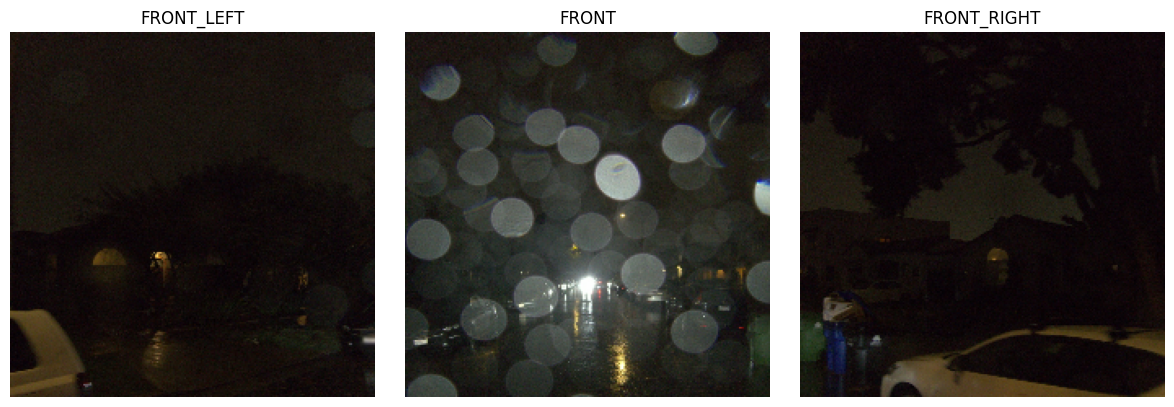

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
camera_names = ["FRONT_LEFT", "FRONT", "FRONT_RIGHT"]

for i in range(3):
    img = sample_images[i].permute(1, 2, 0).cpu().numpy()  # [224, 224, 3]
    axes[i].imshow(img)
    axes[i].set_title(camera_names[i])
    axes[i].axis("off")

plt.tight_layout()
plt.show()



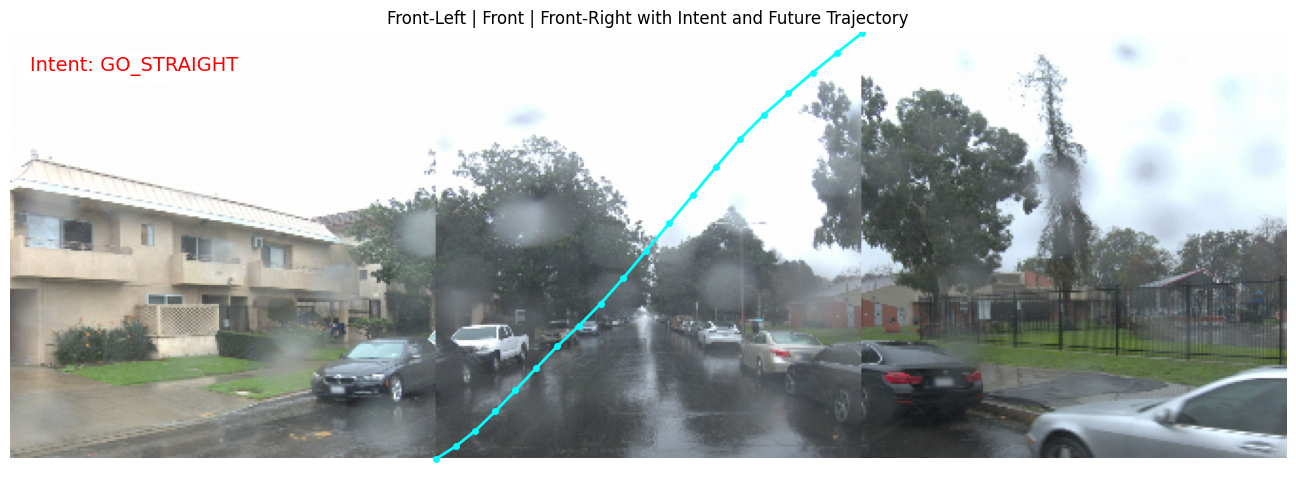

In [17]:
# Define the reverse mapping for intent labels
intent_lookup = {0: "UNKNOWN", 1: "GO_STRAIGHT", 2: "GO_LEFT", 3: "GO_RIGHT"}

# Get one batch from the DataLoader
batch = next(iter(train_loader))
images = batch["images"]
intents = batch["intent"]
past_dyn = batch["past_dyn"]
targets = batch["target"]

# Pick the first sample
sample_images = images[0]         # shape: [3, 3, 224, 224]
sample_intent = intents[0]        # shape: [4]
sample_target = targets[0]        # shape: [20, 3]

# Convert one-hot intent to string
intent_str = intent_lookup[torch.argmax(sample_intent).item()]

# Convert each image from [C, H, W] -> [H, W, C] for matplotlib
images_np = [img.permute(1, 2, 0).cpu().numpy() for img in sample_images]  # [3, 224, 224, 3]
concat_img = np.concatenate(images_np, axis=1)  # shape: [224, 224*3, 3]

# Dummy transformation: map vehicle-frame (x, y) to image pixels
def dummy_transform(x, y, img_width=224, img_height=224):
    u = (x - np.min(sample_target[:, 0].numpy())) / (np.ptp(sample_target[:, 0].numpy()) + 1e-5) * img_width
    v = (y - np.min(sample_target[:, 1].numpy())) / (np.ptp(sample_target[:, 1].numpy()) + 1e-5) * img_height
    return u, v

# Project target future XY points onto the middle (front) image (assume it's centered)
target_xy = sample_target[:, :2].cpu().numpy()
proj_points = np.array([dummy_transform(x, y) for x, y in target_xy])
proj_points[:, 0] += 224  # shift X-coordinates to align with the center (FRONT) image

# Show the concatenated image
plt.figure(figsize=(15, 5))
plt.imshow(concat_img)
plt.axis('off')

# Overlay the intent
plt.text(10, 20, f"Intent: {intent_str}", color='red',
         fontsize=14, backgroundcolor='white')

# Overlay trajectory (in blue)
plt.plot(proj_points[:, 0], proj_points[:, 1], '-o', color='cyan', linewidth=2, markersize=4)

plt.title("Front-Left | Front | Front-Right with Intent and Future Trajectory")
plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import timm


# The following is the big model

In [18]:

# class WaymoViTModel(nn.Module):
#     def __init__(self,
#                  image_model_name="vit_base_patch16_224",
#                  image_embedding_dim=768,
#                  past_dyn_dim=6,
#                  past_dyn_len=16,
#                  fused_hidden_dim=512,
#                  output_steps=20):
#         super(WaymoViTModel, self).__init__()

#         # Vision Transformer from timm
#         self.vit = timm.create_model(image_model_name, pretrained=True)
#         self.vit.reset_classifier(0)  # Remove classification head

#         # Encode past dynamics with a simple MLP
#         self.past_dyn_encoder = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(past_dyn_dim * past_dyn_len, 128),
#             nn.ReLU(),
#             nn.Linear(128, 128)
#         )

#         # Encode intent
#         self.intent_encoder = nn.Sequential(
#             nn.Linear(4, 32),
#             nn.ReLU(),
#             nn.Linear(32, 32)
#         )

#         # Fusion + Decoder
#         total_fused_dim = image_embedding_dim + 128 + 32
#         self.fusion_mlp = nn.Sequential(
#             nn.Linear(total_fused_dim, fused_hidden_dim),
#             nn.ReLU(),
#             nn.Linear(fused_hidden_dim, fused_hidden_dim),
#             nn.ReLU(),
#             nn.Linear(fused_hidden_dim, output_steps * 2)  # (x, y) for each step
#         )

#     def forward(self, images, intent, past_dyn):
#         """
#         images: Tensor [B, 3, 3, 224, 224]
#         intent: Tensor [B, 4]
#         past_dyn: Tensor [B, 16, 6]
#         """
#         B, C, _, H, W = images.shape

#         # Process each image in the triplet
#         images = images.view(B * C, 3, H, W)  # [B*3, 3, H, W]
#         img_features = self.vit(images)       # [B*3, 768]
#         img_features = img_features.view(B, C, -1)  # [B, 3, 768]
#         img_features = img_features.mean(dim=1)     # [B, 768]

#         # Encode past dynamics
#         dyn_feat = self.past_dyn_encoder(past_dyn)  # [B, 128]

#         # Encode intent
#         intent_feat = self.intent_encoder(intent)   # [B, 32]

#         # Fuse features
#         fused = torch.cat([img_features, dyn_feat, intent_feat], dim=1)  # [B, total_dim]

#         # Predict future trajectory
#         out = self.fusion_mlp(fused)         # [B, 20*2]
#         out = out.view(B, 20, 2)             # [B, 20, 2] -> (x, y)

#         return out


# We will freeze use this small model with frozen weights

In [19]:
# Frozen Model and tiny 22M parms

class ViTWaypointPredictor(nn.Module):
    def __init__(self, image_model_name='vit_tiny_patch16_224', past_dyn_dim=6, num_past_steps=16, num_intent_classes=4, future_steps=20):
        super().__init__()

        # Load ViT backbone
        self.vit = timm.create_model(image_model_name, pretrained=True)
        self.vit.reset_classifier(0)  # remove classification head

        # Freeze ViT weights
        for param in self.vit.parameters():
            param.requires_grad = False
        self.vit.eval()

        self.image_feat_dim = self.vit.num_features  # usually 768 for vit_base

        # Encode 3 camera views
        self.image_proj = nn.Linear(self.image_feat_dim * 3, 256)  # [cam1|cam2|cam3] concat -> single vector

        # Past dynamics encoder (16 steps of 6 features)
        self.past_dyn_encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_past_steps * past_dyn_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )

        # Intent encoder
        self.intent_encoder = nn.Sequential(
            nn.Linear(num_intent_classes, 16),
            nn.ReLU()
        )

        # Fusion + Prediction MLP
        self.fusion_mlp = nn.Sequential(
            nn.Linear(256 + 64 + 16, 128),
            nn.ReLU(),
            nn.Linear(128, future_steps * 2)  # Predict (x, y) for each future step
        )

        self.future_steps = future_steps

    def forward(self, images, intent, past_dyn):
        B, C, _, _, _ = images.shape  # [B, 3, 3, 224, 224]

        # Flatten camera views: process each with ViT, concatenate features
        vit_features = []
        for cam in range(C):
            cam_img = images[:, cam]  # [B, 3, 224, 224]
            with torch.no_grad():  # ViT is frozen
                feat = self.vit(cam_img)  # [B, D]
            vit_features.append(feat)

        vision_feat = torch.cat(vit_features, dim=1)  # [B, D*3]
        vision_feat = self.image_proj(vision_feat)    # [B, 256]

        dyn_feat = self.past_dyn_encoder(past_dyn)    # [B, 64]
        intent_feat = self.intent_encoder(intent)     # [B, 16]

        fused = torch.cat([vision_feat, dyn_feat, intent_feat], dim=1)  # [B, 336]
        out = self.fusion_mlp(fused)  # [B, 40]

        return out.view(-1, self.future_steps, 2)  # [B, 20, 2]


In [20]:
# model = WaymoViTModel()
model = ViTWaypointPredictor()
# print the number of params inm model in million
# print(f"Number of parameters: {sum(p.numel() for p in model.parameters())/1e6:.2f}M")
print(f"Number of parameters: {sum(p.numel() for p in model.parameters())/1e6:.2f}M")
sample = next(iter(train_loader))  # Your DataLoader
images = sample['images']      # [B, 3, 3, 224, 224]
intent = sample['intent']      # [B, 4]
past_dyn = sample['past_dyn'] # [B, 16, 6]

out = model(images, intent, past_dyn)     # [B, 20, 2]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Number of parameters: 5.74M


In [28]:
loss_list = []
def train(model, dataset, device='cpu', epochs=2, batch_size=16):
    model = model.to(device)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)

    # Only trainable parameters (ViT is frozen)
    optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)
    loss_fn = nn.MSELoss()

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in dataloader:
            images = batch["images"].to(device)        # [B, 3, 3, 224, 224]
            intent = batch["intent"].to(device)        # [B, 4]
            past_dyn = batch["past_dyn"].to(device)    # [B, 16, 6]
            targets = batch["target"].to(device)       # [B, 20, 3]

            optimizer.zero_grad()
            preds = model(images, intent, past_dyn)    # [B, 20, 2]

            loss = loss_fn(preds, targets[:, :, :2])   # compare only (x, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        loss_list.append(total_loss)

        print(f"Epoch {epoch+1} - Loss: {total_loss / len(dataloader):.4f}")


Epoch 1 - Loss: 215.3116
Epoch 2 - Loss: 113.5392
Epoch 3 - Loss: 61.4678
Epoch 4 - Loss: 36.7025
Epoch 5 - Loss: 22.1463
Epoch 6 - Loss: 18.7453
Epoch 7 - Loss: 15.1299
Epoch 8 - Loss: 12.8292
Epoch 9 - Loss: 10.9937
Epoch 10 - Loss: 11.3260


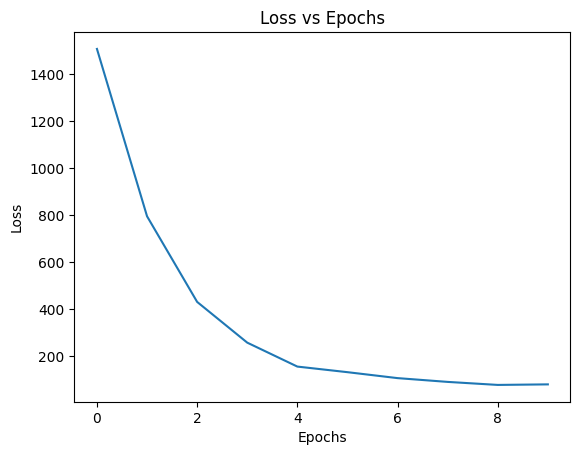

In [29]:
model = ViTWaypointPredictor()
train(model, dataset=train_dataset, epochs = 10)
# plot the loss vs epochs
fig, ax = plt.subplots()
ax.plot(loss_list)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Loss vs Epochs')
plt.show()

In [30]:

def visualize_predictions(model, val_dataloader, device='cpu'):
    model.eval()
    model.to(device)

    # Load one batch from validation dataloader
    batch = next(iter(val_dataloader))

    with torch.no_grad():
        images = batch["images"].to(device)        # [B, 3, 3, 224, 224]
        intent = batch["intent"].to(device)        # [B, 4]
        past_dyn = batch["past_dyn"].to(device)    # [B, 16, 6]
        target = batch["target"].to(device)        # [B, 20, 3]

        preds = model(images, intent, past_dyn)    # [B, 20, 2]

    # Move to CPU for plotting
    preds = preds.cpu().numpy()
    gt = target[:, :, :2].cpu().numpy()

    # Plot first 5 samples in the batch
    for i in range(min(5, preds.shape[0])):
        plt.figure(figsize=(5, 5))
        plt.plot(gt[i, :, 0], gt[i, :, 1], 'g-o', label='Ground Truth')
        plt.plot(preds[i, :, 0], preds[i, :, 1], 'r--x', label='Predicted')
        plt.title(f"Trajectory Prediction Sample {i}")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.grid(True)
        plt.axis("equal")
        plt.show()


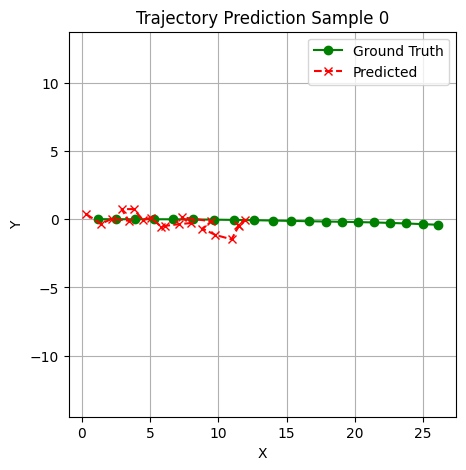

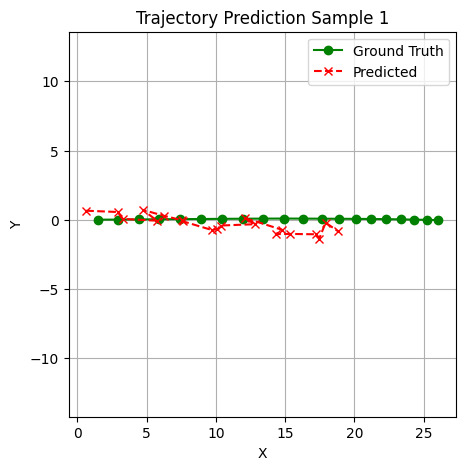

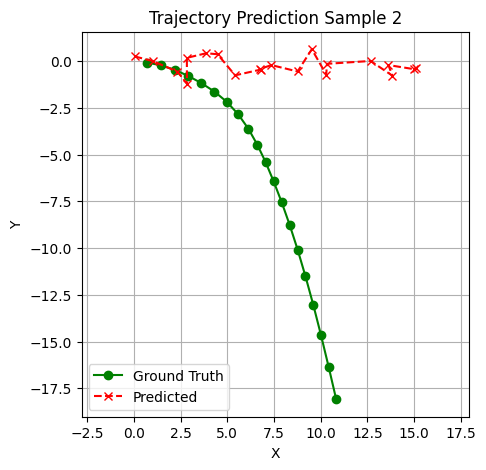

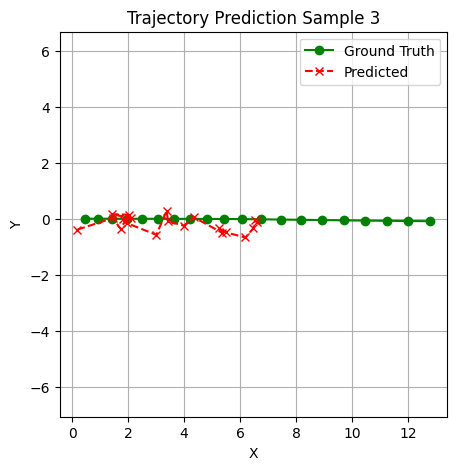

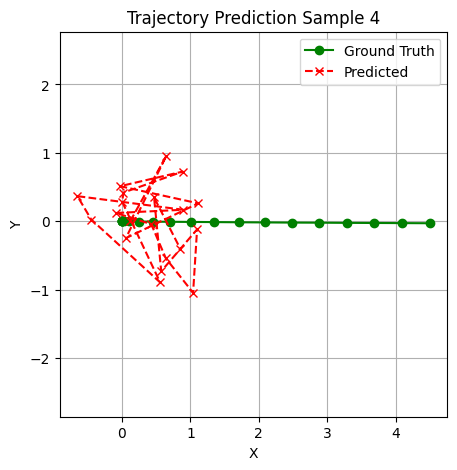

In [32]:
visualize_predictions(model, val_loader, device='cpu')
